**Kernel SVM**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [13]:
df = pd.read_csv('Customers.csv')
print(df.head())
print(df.info())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('Feature scaling applied.')

Feature scaling applied.


In [16]:
# Training the SVM model on the Training set
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [17]:
# Predicting a new result
new_customer = sc.transform([[30, 60000]])
prediction = classifier.predict(new_customer)
print('Predicted purchase decision for the new customer:', 'Buy' if prediction[0] == 1 else 'Not Buy')

Predicted purchase decision for the new customer: Not Buy


This means the model predicts that the hypothetical customer with an age of 30 and an estimated salary of $60,000 will not buy the insurance product.

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [19]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


In [20]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.93


<ipython-input-22-04e2ee1a1da2>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


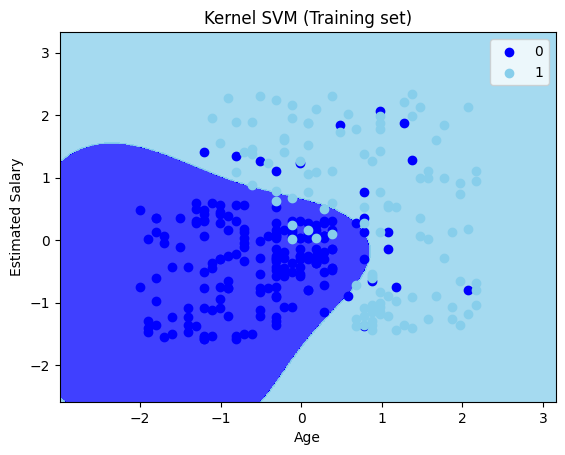

<Figure size 640x480 with 0 Axes>

<ipython-input-22-04e2ee1a1da2>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


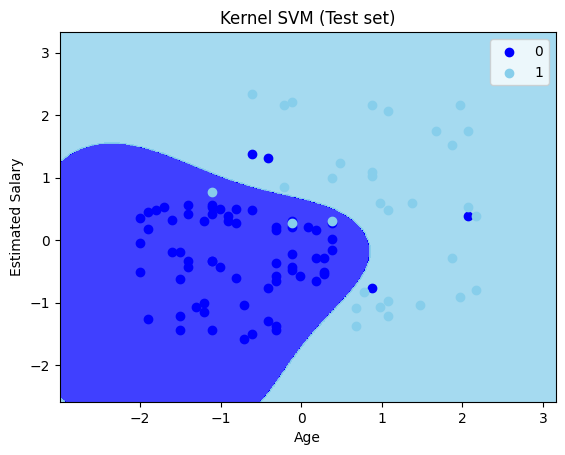

<Figure size 640x480 with 0 Axes>

In [22]:
# Function to visualize the results
def visualize_results(X_set, y_set, model, title):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('blue', 'skyblue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('blue', 'skyblue'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.figure(facecolor='white')
    plt.show()

# Visualizing the Training set results
visualize_results(X_train, y_train, classifier, 'Kernel SVM (Training set)')

# Visualizing the Test set results
visualize_results(X_test, y_test, classifier, 'Kernel SVM (Test set)')

These plots display the decision boundary determined by the Kernel SVM model. The red and green points represent the two classes of customers (not purchased and purchased, respectively). The background color shows the model's prediction for any given point in the feature space, with red indicating a prediction of not purchasing and green indicating a prediction of purchasing.

The decision boundary is non-linear, as expected from a Kernel SVM model, which allows for more complex relationships between the features and the target variable to be captured compared to linear models. The areas of red and green show where the model predicts each class, and the points show the actual class of the training or test data. The goal is for the points to match the background color, indicating correct predictions.

These visualizations help in understanding how well the model generalizes to new data, with the test set results providing insight into the model's performance on unseen data.

